#                                Capstone Project Solution

## Name : Umme Rubaiyat Chowdhury

### DS3

# Data Analysis & Preprocessing

In [2]:
## REQUIRED LIBRARIES
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Read the data frame
df = pd.read_csv('HR+analytics+dataset.csv', delimiter=',')
df.shape

FileNotFoundError: [Errno 2] File HR+analytics+dataset.csv does not exist: 'HR+analytics+dataset.csv'

In [3]:
# Check columns list and missing values
df.isnull().sum()

Gender            0
Business          0
Age               0
Salary            0
Dependancies      0
Months            0
Calls             0
Type              0
Billing           0
Unit_Sales        0
Total_Sales       0
Rating            0
Bonus             0
BasePay           0
Unit_Price        0
Volume            0
openingbalance    0
closingbalance    0
low               0
dtype: int64

In [4]:
# Get unique count for each variable
df.nunique()

Gender               2
Business             2
Age                 68
Salary            5048
Dependancies         2
Months              73
Calls                2
Type                 3
Billing              2
Unit_Sales        1439
Total_Sales       4756
Rating               2
Bonus             4099
BasePay           2949
Unit_Price        3871
Volume            4879
openingbalance    4045
closingbalance    4044
low               4052
dtype: int64

In [5]:
df = df.drop(["openingbalance", "BasePay","Bonus","closingbalance"], axis = 1)

In [6]:
# Review the top rows of what is left of the data frame
df.head(5)

,Gender,Business,Age,Salary,Dependancies,Months,Calls,Type,Billing,Unit_Sales,Total_Sales,Rating,Unit_Price,Volume,low
0,Female,0,42,101348.88,No,1,No,Month-to-month,Yes,29.85,29.85,No,126.250000,2163600,122.309998
1,Male,0,41,112542.58,No,34,Yes,One year,No,56.95,1889.5,No,125.540001,2386400,119.940002
2,Male,0,42,113931.57,No,2,Yes,Month-to-month,Yes,53.85,108.15,Yes,119.739998,2489500,114.930000
3,Male,0,39,93826.63,No,45,No,One year,No,42.30,1840.75,No,117.440002,2006300,113.500000
4,Female,0,43,79084.10,No,2,Yes,Month-to-month,Yes,70.70,151.65,Yes,117.330002,1408600,114.089996


In [7]:
# Check variable data types
df.dtypes

Gender           object
Business          int64
Age               int64
Salary          float64
Dependancies     object
Months            int64
Calls            object
Type             object
Billing          object
Unit_Sales      float64
Total_Sales      object
Rating           object
Unit_Price      float64
Volume            int64
low             float64
dtype: object

In [8]:
#Print a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5049 entries, 0 to 5048
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gender        5049 non-null   object 
 1   Business      5049 non-null   int64  
 2   Age           5049 non-null   int64  
 3   Salary        5049 non-null   float64
 4   Dependancies  5049 non-null   object 
 5   Months        5049 non-null   int64  
 6   Calls         5049 non-null   object 
 7   Type          5049 non-null   object 
 8   Billing       5049 non-null   object 
 9   Unit_Sales    5049 non-null   float64
 10  Total_Sales   5049 non-null   object 
 11  Rating        5049 non-null   object 
 12  Unit_Price    5049 non-null   float64
 13  Volume        5049 non-null   int64  
 14  low           5049 non-null   float64
dtypes: float64(4), int64(4), object(7)
memory usage: 591.8+ KB


In [9]:
#Replace the EMPTY String (NAN) value of Total_Sales column with 0 
df["Total_Sales"].replace({" ": "0"}, inplace=True)


In [10]:
#Convert the Data Type of Total_Sales column to float64 for numerical analysis 
df.Total_Sales  = df.Total_Sales.astype('float64')

In [11]:
df.describe()

,Business,Age,Salary,Months,Unit_Sales,Total_Sales,Unit_Price,Volume,low
count,5049.000000,5049.000000,5049.000000,5049.000000,5049.000000,5049.000000,5049.000000,5.049000e+03,5049.000000
mean,0.160032,39.012280,100326.490008,32.217271,64.772103,2267.934175,51.224542,6.735758e+06,43.037421
std,0.366672,10.600392,57743.911455,24.625027,30.161810,2268.060407,52.061379,1.613986e+07,36.686894
min,0.000000,18.000000,11.580000,0.000000,18.250000,0.000000,1.440000,0.000000e+00,3.650000
25%,0.000000,32.000000,50679.480000,9.000000,35.400000,383.550000,25.760000,1.281700e+06,21.752501
50%,0.000000,37.000000,100601.730000,28.000000,70.400000,1389.850000,39.240002,2.864200e+06,32.930000
75%,0.000000,44.000000,149139.130000,55.000000,89.950000,3739.800000,58.590000,6.205100e+06,50.529999
max,1.000000,88.000000,199970.740000,72.000000,118.750000,8684.800000,629.511067,3.208684e+08,312.432438


In [12]:
#Replace the Null value of Total_Sales column with The Mean of Total_Sales
df["Total_Sales"].replace({0 : 2267.934175}, inplace=True)

In [13]:
#For salary analysis I have skipped the values with 0 for Months Column as the data of First month of an Employee will not make
#any difference in the salary
df.drop(df[df['Months'] <= 0].index, inplace = True)
df.shape 

(5041, 15)

In [14]:
df.describe()

,Business,Age,Salary,Months,Unit_Sales,Total_Sales,Unit_Price,Volume,low
count,5041.000000,5041.000000,5041.000000,5041.000000,5041.000000,5041.000000,5041.000000,5.041000e+03,5041.000000
mean,0.160286,39.001389,100312.178907,32.268399,64.815255,2271.533356,51.236772,6.741608e+06,43.038394
std,0.366907,10.589406,57746.841135,24.611061,30.154254,2268.057751,52.094317,1.615168e+07,36.705400
min,0.000000,18.000000,11.580000,1.000000,18.250000,18.800000,1.440000,0.000000e+00,3.650000
25%,0.000000,32.000000,50664.070000,9.000000,35.500000,387.400000,25.760000,1.283100e+06,21.752501
50%,0.000000,37.000000,100557.030000,28.000000,70.450000,1391.650000,39.240002,2.864200e+06,32.910000
75%,0.000000,44.000000,149139.130000,55.000000,89.950000,3753.200000,58.590000,6.210700e+06,50.489949
max,1.000000,88.000000,199970.740000,72.000000,118.750000,8684.800000,629.511067,3.208684e+08,312.432438


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


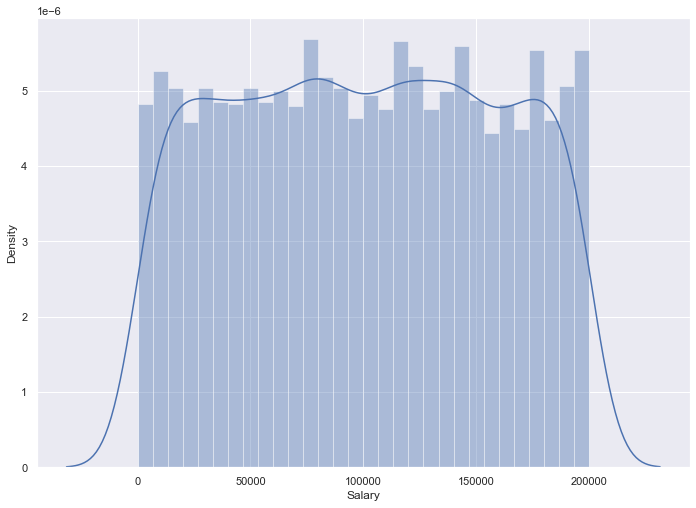

In [15]:
#Analyzing how the salary is distributed 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['Salary'],bins=30)
plt.show()

# Identifying the percentile for the Salary Column

In [16]:
min_sal_threshold= df['Salary'].quantile(0.05)
min_sal_threshold

9903.42

In [17]:
#the upper quantile threshold
max_sal_threshold= df['Salary'].quantile(0.95)
max_sal_threshold

191057.76

In [18]:
#df.loc[df.Salary < 9903.42, 'Salary'] = 9903.42

#Dropping the lower quantile threshold salaray column values
df.drop(df[df['Salary'] <=9903.42].index, inplace = True)
df.shape 
#df['Salary'].min()

(4788, 15)

In [19]:
(df['Salary']>= 191057.76).sum()

253

In [20]:
#Dropping the upper quantile threshold salaray column values
df.drop(df[df['Salary'] >= 191057.76].index, inplace = True)
df.shape 

(4535, 15)

In [21]:
df.describe()

,Business,Age,Salary,Months,Unit_Sales,Total_Sales,Unit_Price,Volume,low
count,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4.535000e+03,4535.000000
mean,0.160529,39.079162,100313.418368,32.339361,64.923341,2278.017398,51.073012,6.640734e+06,42.998513
std,0.367137,10.633637,51904.953449,24.633497,30.160121,2265.904715,51.829990,1.549300e+07,36.497536
min,0.000000,18.000000,9904.630000,1.000000,18.250000,18.800000,1.440000,0.000000e+00,3.650000
25%,0.000000,32.000000,55694.045000,9.000000,35.525000,383.600000,25.719999,1.279750e+06,21.790001
50%,0.000000,37.000000,100557.030000,29.000000,70.500000,1410.250000,39.130001,2.857300e+06,32.930000
75%,0.000000,44.000000,144290.610000,56.000000,90.050000,3740.825000,58.430001,6.154450e+06,50.240000
max,1.000000,88.000000,191035.180000,72.000000,118.750000,8684.800000,629.511067,2.234868e+08,312.432438


array([[<AxesSubplot:title={'center':'Salary'}>]], dtype=object)

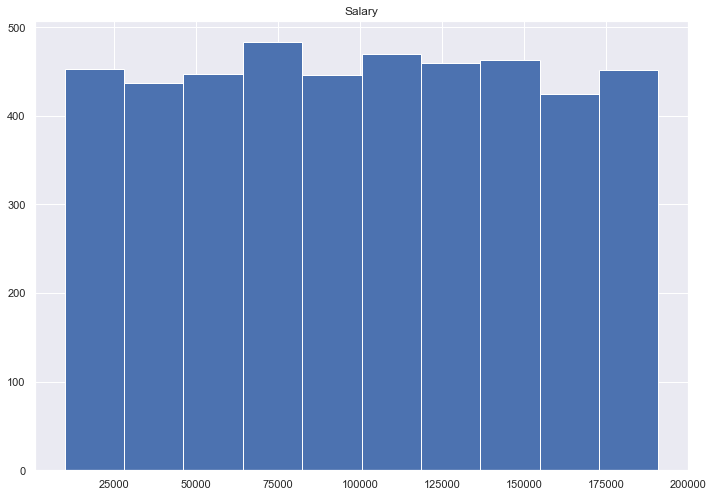

In [22]:
#plotting the Histogram Diagram of the Salary Column
df.hist(column='Salary')

# Correlation Matrix

In [23]:
#Checking correlation matrix
correlarions_matrix = df.corr().round(2)

<AxesSubplot:>

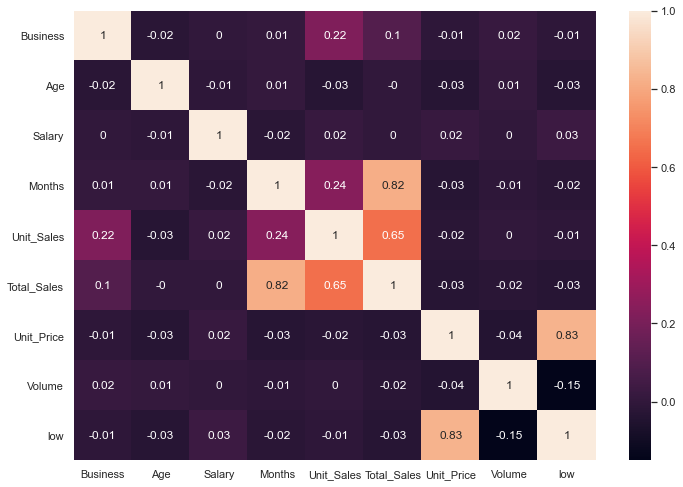

In [24]:
#Plotting the heatmap
sns.heatmap(data= correlarions_matrix,  annot= True)

# Outlier Identification & Removal

In [5]:
#Plotting the boxplot for the Salary Column
df.boxplot('Salary')

NameError: name 'df' is not defined

In [ ]:
#Plotting the boxplot for the Age Column
df.boxplot('Age')

In [28]:
df.shape 

(4535, 15)

In [29]:
#Finding IQR for the removal of outliers of the values of Age column
sort_data = np.sort(df['Age'])
Q1 = np.percentile(df['Age'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df['Age'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
print(IQR)

12.0


In [30]:
low_lim = Q1 - 1.5*IQR 
up_lim = Q3 + 1.5*IQR 
# Printing Results
print('Low_limit is:', low_lim )
print('Upper limit is:', up_lim)
print('Q1:', Q1)
print('Q3:', Q3)

Low_limit is: 14.0
Upper limit is: 62.0
Q1: 32.0
Q3: 44.0


In [31]:
outliers = df.Age[(df.Age >= up_lim) | (df.Age <= low_lim )]
print(outliers)

85      75
104     65
158     73
181     65
230     72
        ..
4966    64
4992    62
5000    68
5020    68
5038    63
Name: Age, Length: 194, dtype: int64


In [32]:
#dropping the outliers
df.drop(df[df['Age']>= 62.0].index, inplace = True)
df.shape 

(4341, 15)

In [33]:
#dropping the outliers
df.drop(df[df['Age']<= 14.0].index, inplace = True)
df.shape 

(4341, 15)

<AxesSubplot:>

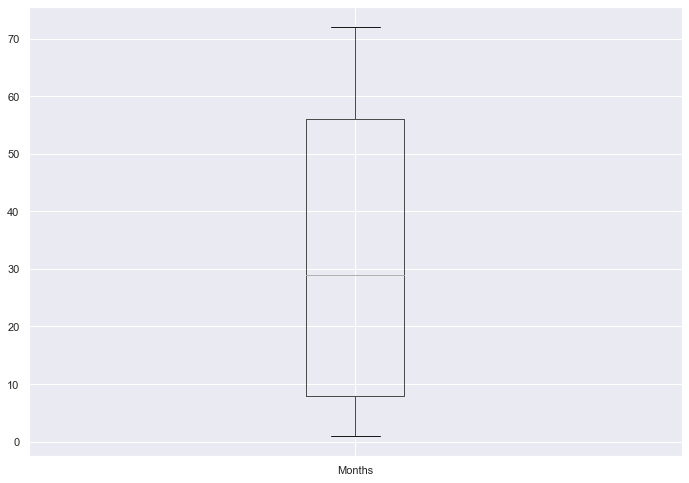

In [34]:
#Plotting the boxplot for the Months Column
df.boxplot('Months') 

<AxesSubplot:>

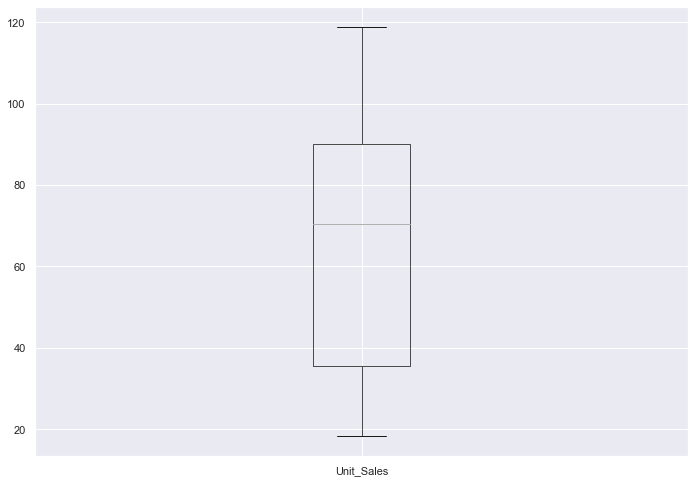

In [35]:
#Plotting the boxplot for the Unit_Sales Column
df.boxplot('Unit_Sales')

<AxesSubplot:>

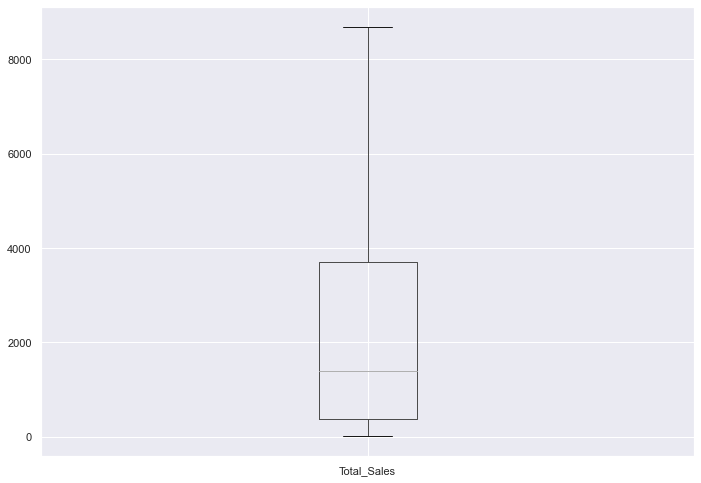

In [36]:
#Plotting the boxplot for the Total_Sales Column
df.boxplot('Total_Sales')

<AxesSubplot:>

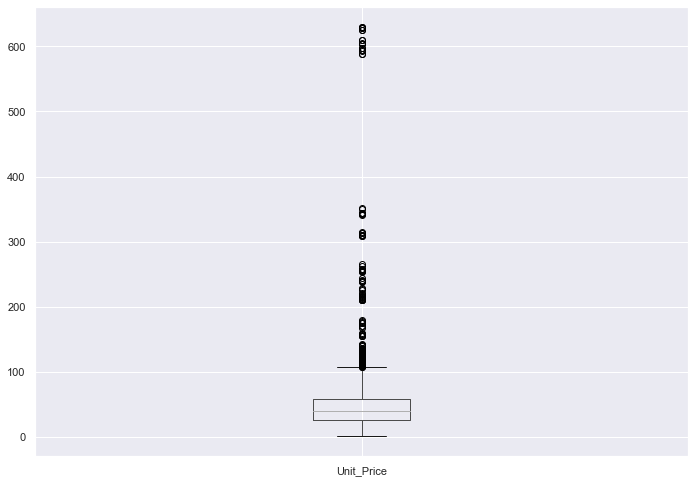

In [37]:
#Plotting the boxplot for the Unit_Price Column
df.boxplot('Unit_Price') 

In [38]:
#Finding IQR for the removal of outliers of the values of Unit_Price column
sort_data = np.sort(df['Unit_Price'])
Q1 = np.percentile(df['Unit_Price'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df['Unit_Price'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
print(IQR)

32.86


In [39]:
low_lim = Q1 - 1.5*IQR 
up_lim = Q3 + 1.5*IQR 
# Printing Results
print('Low_limit is:', low_lim )
print('Upper limit is:', up_lim)
print('Q1:', Q1)
print('Q3:', Q3)

Low_limit is: -23.570000999999998
Upper limit is: 107.869999
Q1: 25.719999
Q3: 58.579999


In [40]:
outliers = df.Unit_Price[(df.Unit_Price >= up_lim) | (df.Unit_Price <= low_lim )]
print(outliers)

0       126.250000
1       125.540001
2       119.739998
3       117.440002
4       117.330002
           ...    
4963    128.000000
4967    108.599998
4979    157.429993
4988    110.910004
5021    341.110001
Name: Unit_Price, Length: 361, dtype: float64


In [41]:
#dropping the outliers
df.drop(df[df['Unit_Price']>= 108.41].index, inplace = True)
df.shape 

(3988, 15)

In [42]:
#dropping the outliers
df.drop(df[df['Unit_Price']<= -23.830000000000002].index, inplace = True)
df.shape 

(3988, 15)

<AxesSubplot:>

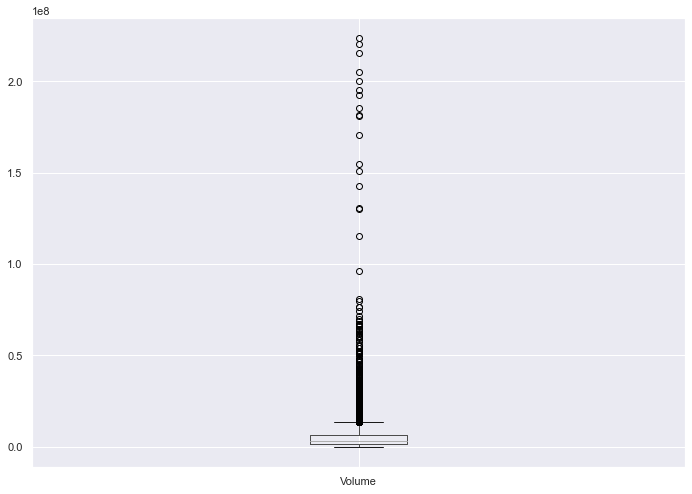

In [43]:
#Plotting the boxplot for the Volume Column
df.boxplot('Volume')

In [44]:
#Finding IQR for the removal of outliers of the values of Volume column
sort_data = np.sort(df['Volume'])
Q1 = np.percentile(df['Volume'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df['Volume'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
print(IQR)

4853500.0


In [45]:
low_lim = Q1 - 1.5*IQR 
up_lim = Q3 + 1.5*IQR 
# Printing Results
print('Low_limit is:', low_lim )
print('Upper limit is:', up_lim)
print('Q1:', Q1)
print('Q3:', Q3)

Low_limit is: -5856950.0
Upper limit is: 13557050.0
Q1: 1423300.0
Q3: 6276800.0


In [46]:
outliers = df.Volume[(df.Volume >= up_lim) | (df.Volume <= low_lim )]
print(outliers)

278      18615100
302     180845200
315      14376100
316      14332300
319      40679300
          ...    
4981    181616500
4994     19370400
4995     14560200
4998     80789300
5036     37607500
Name: Volume, Length: 418, dtype: int64


In [47]:
#dropping the outliers
df.drop(df[df['Volume']>= 13751700.0].index, inplace = True)
df.shape

(3579, 15)

In [48]:
#dropping the outliers
df.drop(df[df['Volume']<= -5947500.0].index, inplace = True)
df.shape

(3579, 15)

<AxesSubplot:>

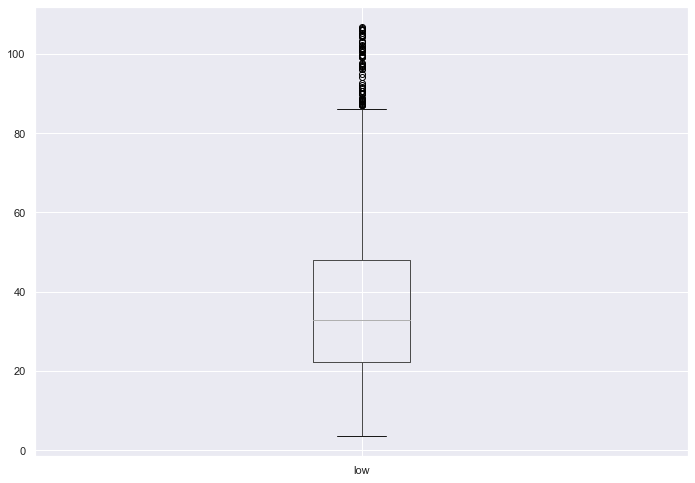

In [49]:
#Plotting the boxplot for the low Column
df.boxplot('low')

In [50]:
#Finding IQR for the removal of outliers of the values of low column
sort_data = np.sort(df['low'])
Q1 = np.percentile(df['low'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df['low'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
print(IQR)

25.720001000000003


In [51]:
low_lim = Q1 - 1.5*IQR 
up_lim = Q3 + 1.5*IQR 
# Printing Results
print('Low_limit is:', low_lim )
print('Upper limit is:', up_lim)
print('Q1:', Q1)
print('Q3:', Q3)

Low_limit is: -16.43000150000001
Upper limit is: 86.45000250000001
Q1: 22.15
Q3: 47.870001


In [52]:
outliers = df.low[(df.low >= up_lim) | (df.low <= low_lim )]
print(outliers)

288     104.529999
342      87.180000
447      96.199997
507      87.120003
535      90.059998
           ...    
4659     99.129997
4719     88.959999
4759    100.970001
4824     90.610001
5022     97.540001
Name: low, Length: 66, dtype: float64


In [53]:
#dropping the outliers
df.drop(df[df['low']>= 86.6].index, inplace = True)
df.shape

(3513, 15)

In [54]:
#dropping the outliers
df.drop(df[df['low']<= -16.520000000000003].index, inplace = True)
df.shape

(3513, 15)

# Various Plotting Analysis

# Bar Plot

<AxesSubplot:xlabel='Rating', ylabel='Salary'>

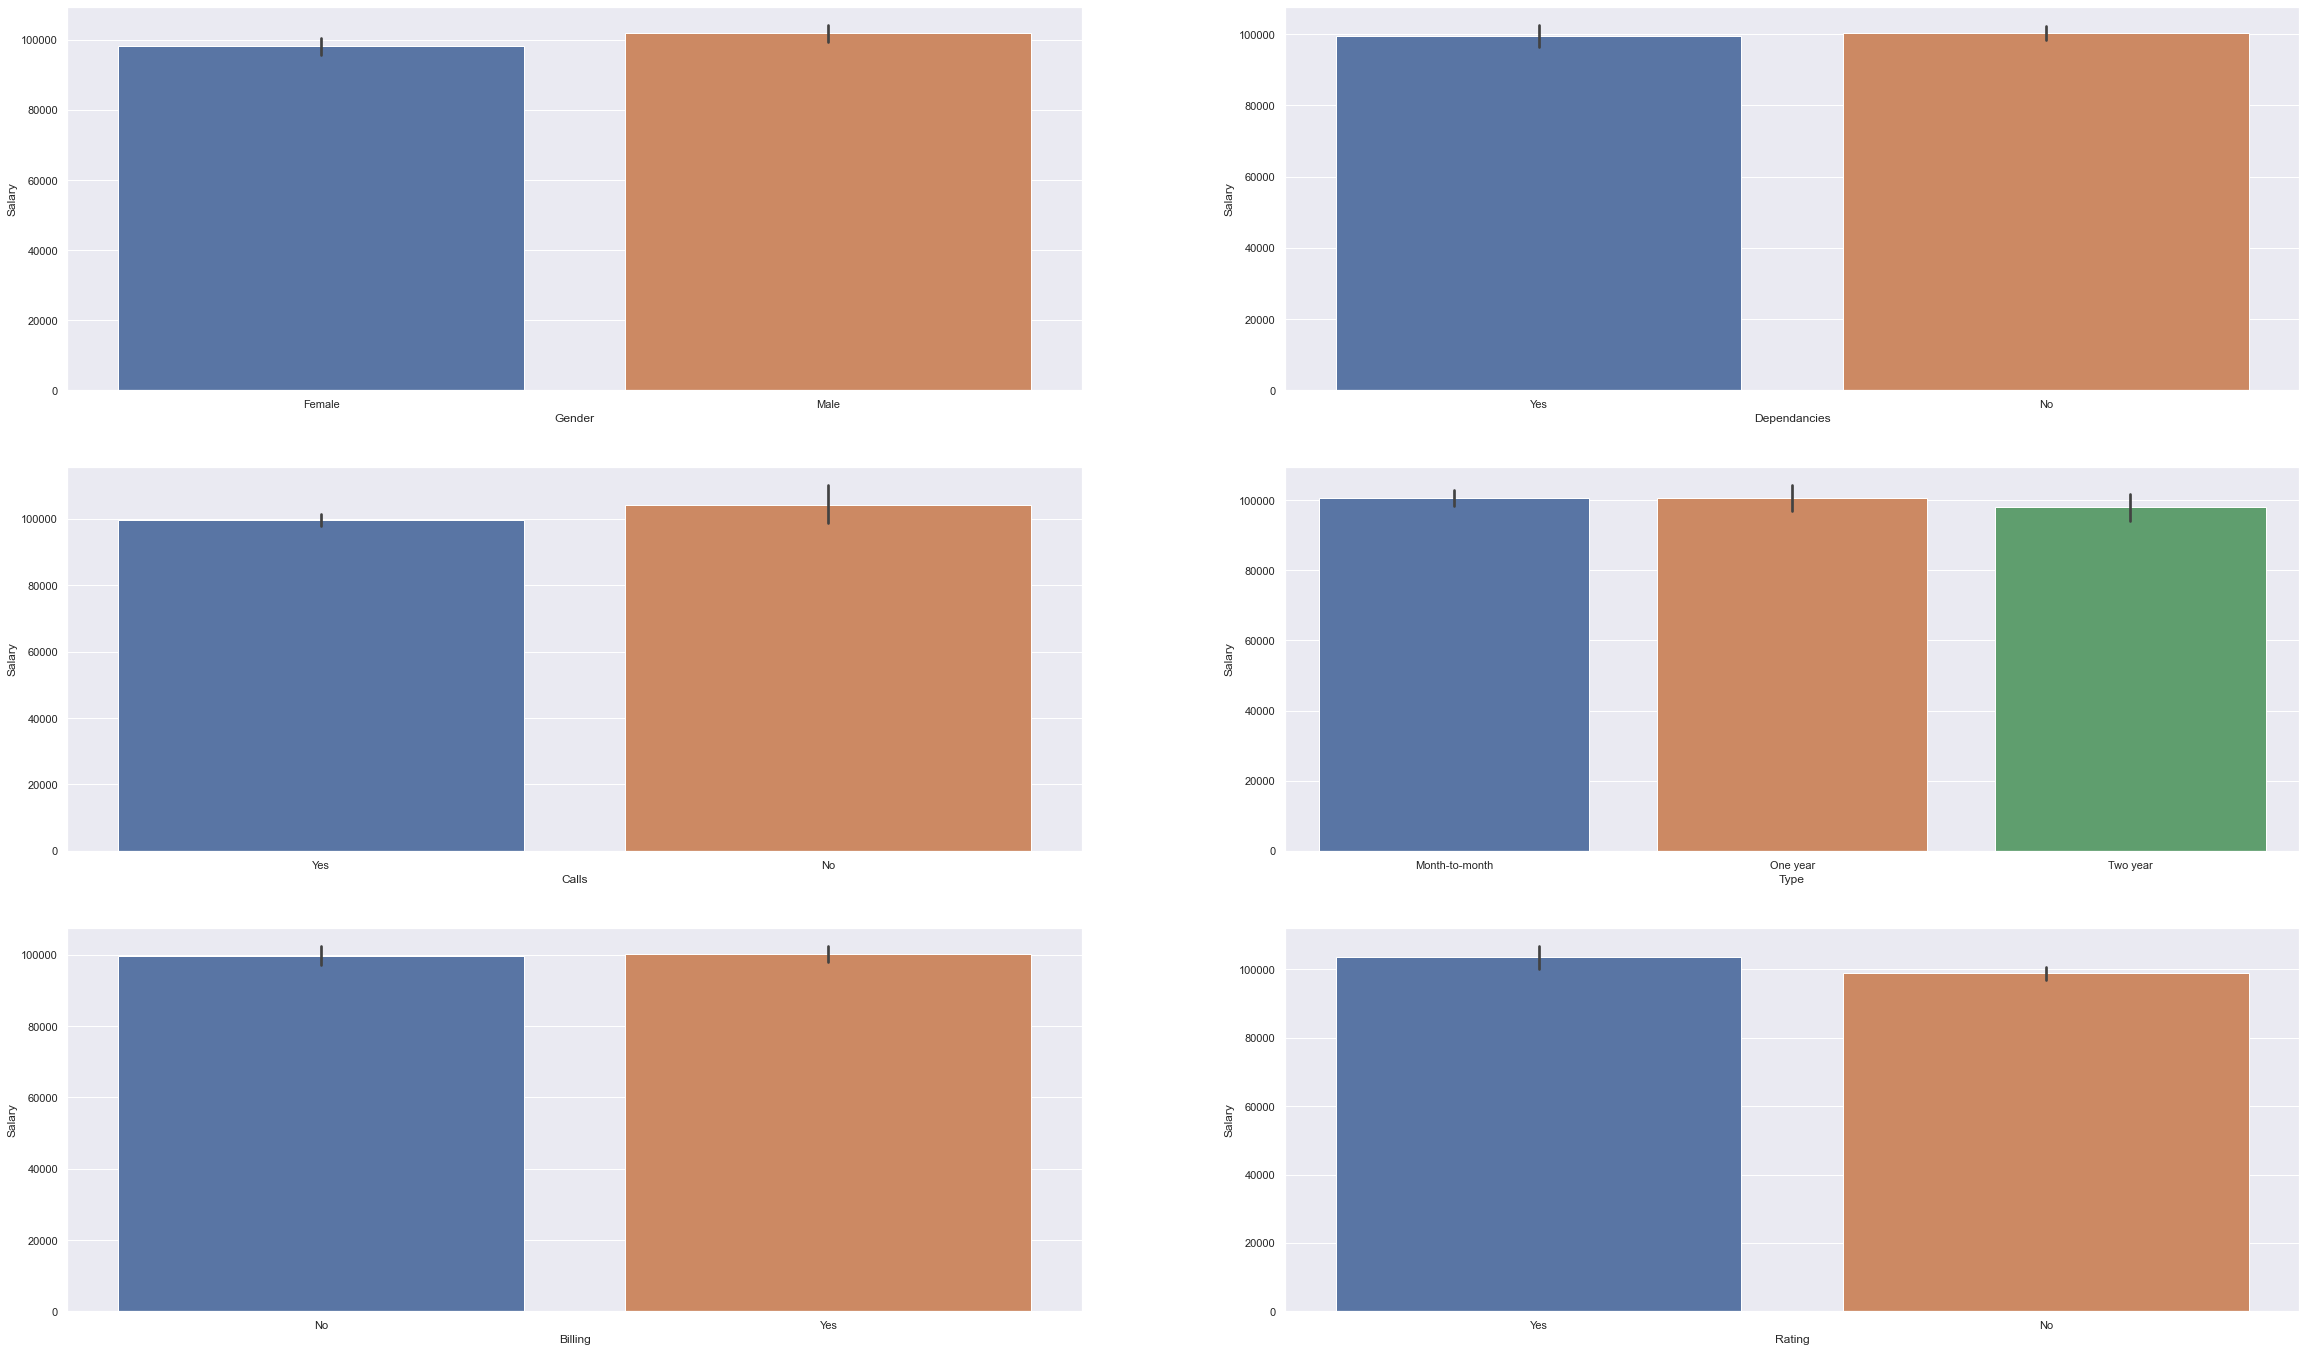

In [55]:
 # Now I have tried to  first review the 'Slary' relation with other categorical variables
fig, axarr = plt.subplots(3, 2,figsize=(40, 24))
sns.barplot(x='Gender', y = 'Salary',data = df, ax=axarr[0][0])
sns.barplot(x='Dependancies', y = 'Salary',data = df, ax=axarr[0][1])
sns.barplot(x='Calls', y = 'Salary',data = df, ax=axarr[1][0])
sns.barplot(x='Type', y = 'Salary',data = df, ax=axarr[1][1])
sns.barplot(x='Billing', y = 'Salary',data = df, ax=axarr[2][0])
sns.barplot(y='Salary',x='Rating',data = df, ax=axarr[2][1])

# Regression Plot

<AxesSubplot:xlabel='low', ylabel='Salary'>

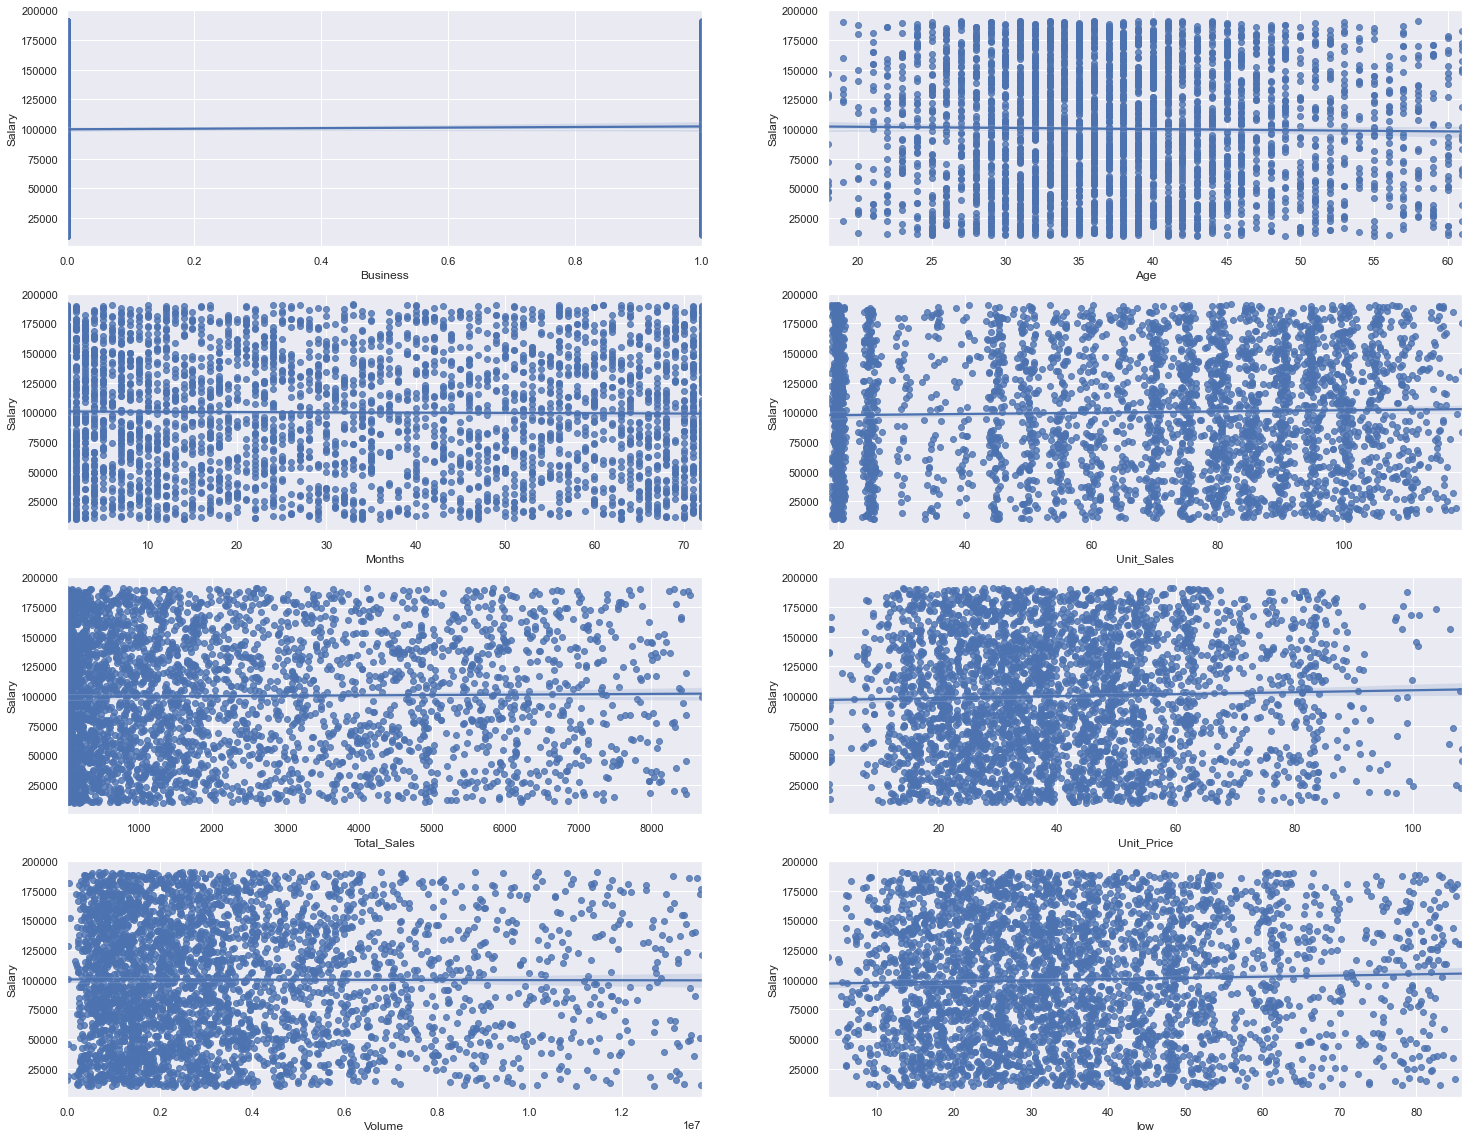

In [56]:
 # Relations based on the continuous data attributes

fig, axarr = plt.subplots(4, 2, figsize=(25, 20))
sns.regplot(y='Salary',x = 'Business', data = df, ax=axarr[0][0])
sns.regplot(y='Salary',x = 'Age',  data = df , ax=axarr[0][1])
sns.regplot(y='Salary',x = 'Months', data = df, ax=axarr[1][0])
sns.regplot(y='Salary',x = 'Unit_Sales', data = df, ax=axarr[1][1])
sns.regplot(y='Salary',x = 'Total_Sales', data = df, ax=axarr[2][0])
sns.regplot(y='Salary',x = 'Unit_Price',  data = df, ax=axarr[2][1])
sns.regplot(y='Salary',x = 'Volume',  data = df, ax=axarr[3][0] )
sns.regplot(y='Salary',x = 'low',  data = df, ax=axarr[3][1])

# Box Plot

<AxesSubplot:xlabel='Business', ylabel='Salary'>

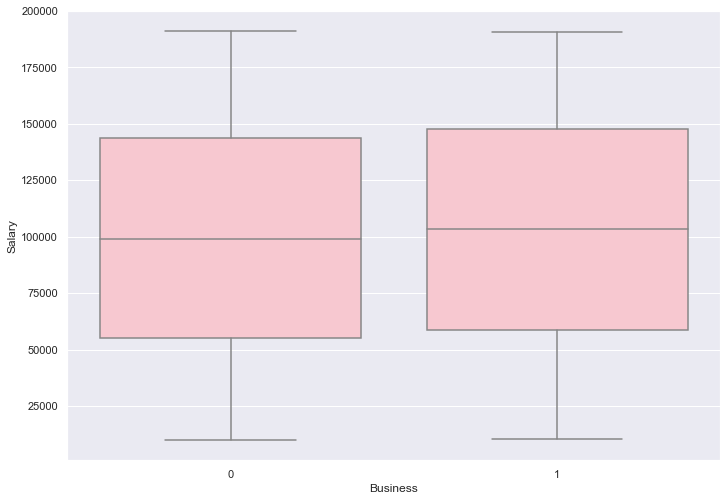

In [57]:
#As the business column has the binary value, so for better understanding I used boxplot
sns.boxplot(y='Salary',x = 'Business', data = df,color="pink")

# Scatterplot

<AxesSubplot:xlabel='low', ylabel='Salary'>

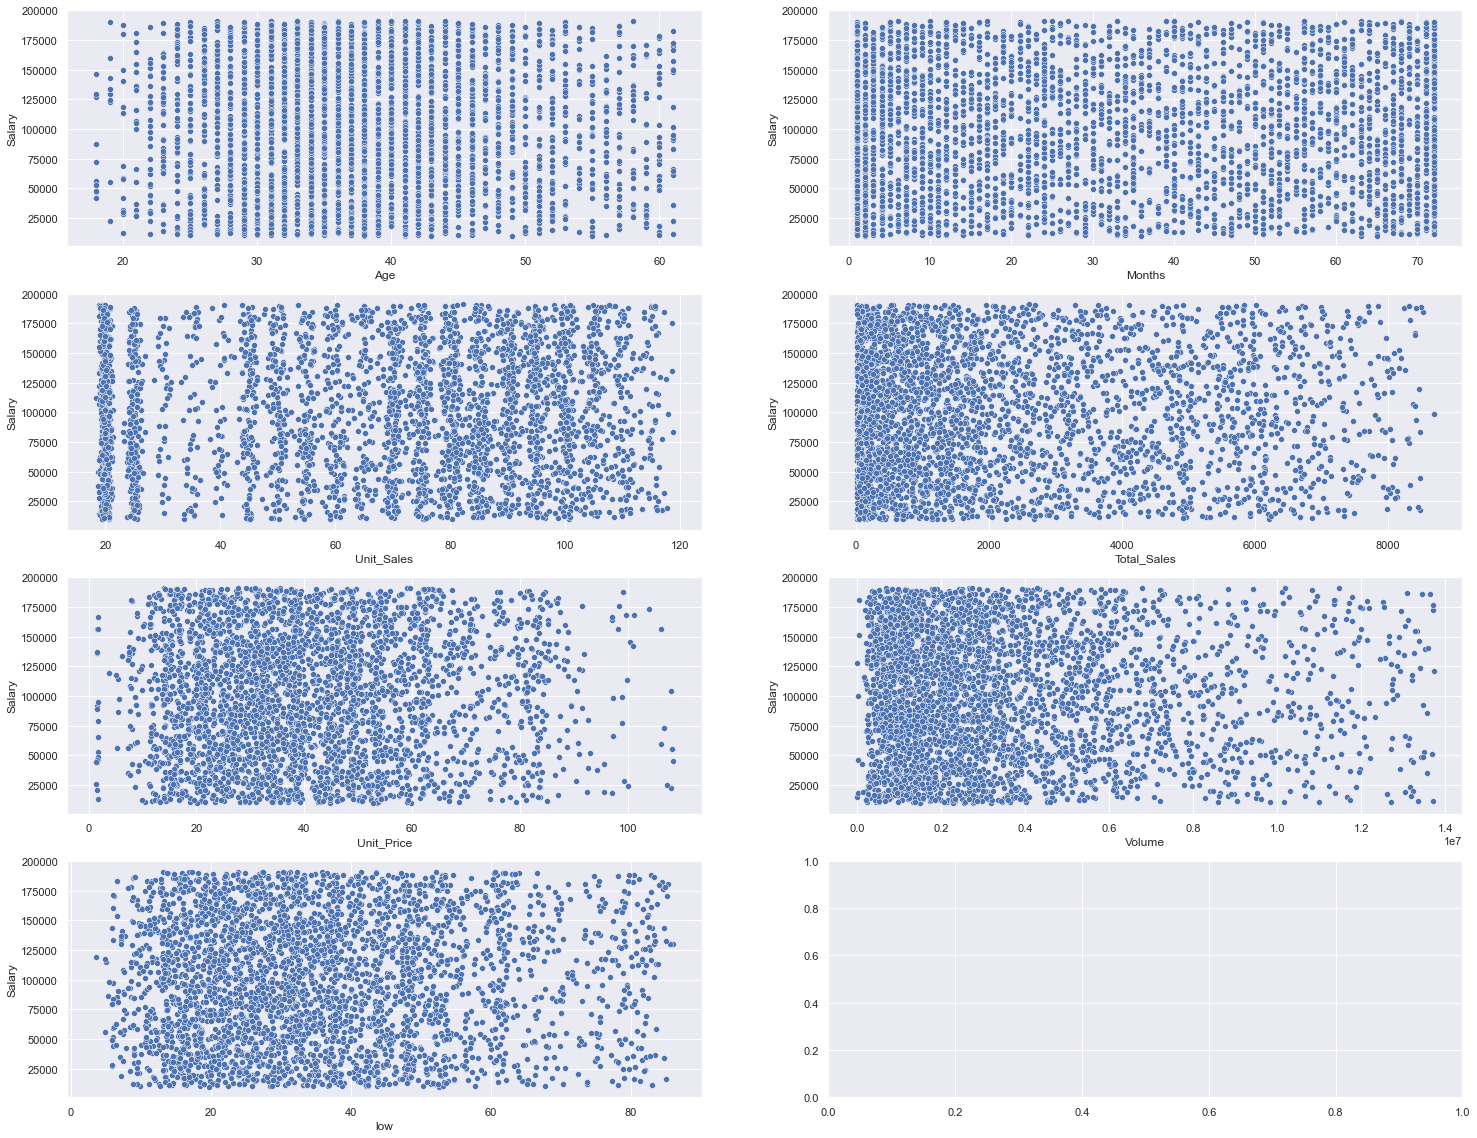

In [58]:
 # Relations based on the continuous data attributes
fig, axarr = plt.subplots(4, 2, figsize=(25, 20))
 
sns.scatterplot(y='Salary',x = 'Age',  data = df , ax=axarr[0][0])
sns.scatterplot(y='Salary',x = 'Months', data = df, ax=axarr[0][1])
sns.scatterplot(y='Salary',x = 'Unit_Sales', data = df, ax=axarr[1][0])
sns.scatterplot(y='Salary',x = 'Total_Sales', data = df, ax=axarr[1][1])
sns.scatterplot(y='Salary',x = 'Unit_Price',  data = df, ax=axarr[2][0])
sns.scatterplot(y='Salary',x = 'Volume',  data = df, ax=axarr[2][1])
sns.scatterplot(y='Salary',x = 'low',  data = df, ax=axarr[3][0])

# Joint Plot

### Joint Plot Salary & Age

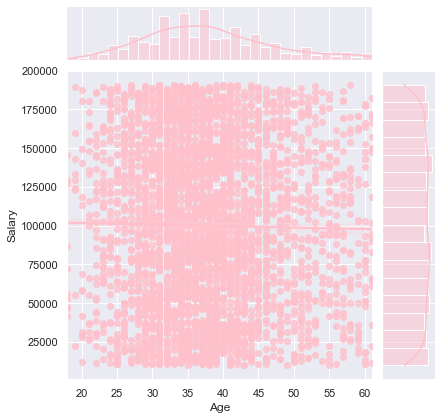

In [59]:
 # Relations based on the continuous data attributes
sns.jointplot(y='Salary',x = 'Age', kind = "reg", data = df,  ax=axarr[0][0],color="pink")


### Joint Plot Salary & Months

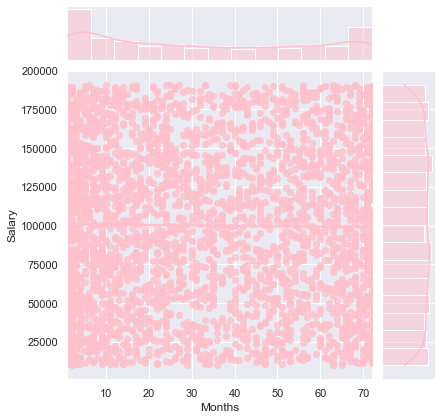

In [60]:
sns.jointplot(y='Salary',x = 'Months', kind = "reg", data = df, ax=axarr[0][1],color="pink")

### Joint Plot Salary & Unit_Sales

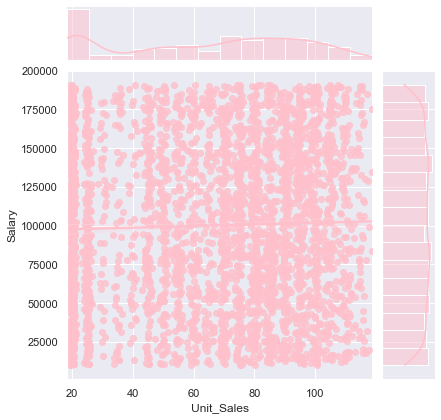

In [61]:
sns.jointplot(y='Salary',x = 'Unit_Sales', kind = "reg", data = df, ax=axarr[1][0],color="pink")

### Joint Plot Salary & Total_Sales

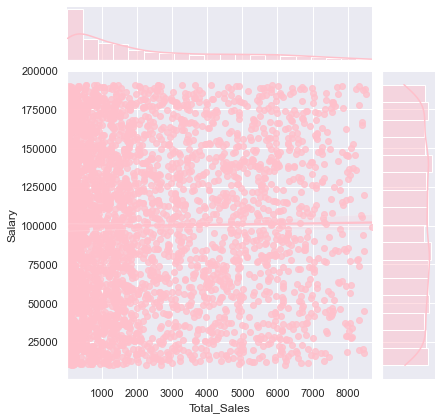

In [62]:
sns.jointplot(y='Salary',x = 'Total_Sales', kind = "reg", data = df,  ax=axarr[1][1],color="pink")

### Joint Plot Salary & Unit_Price

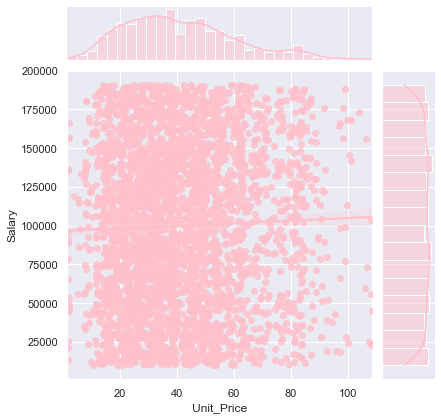

In [63]:
sns.jointplot(y='Salary',x = 'Unit_Price', kind = "reg", data = df,  ax=axarr[2][0],color="pink")

### Joint Plot Salary & Volume

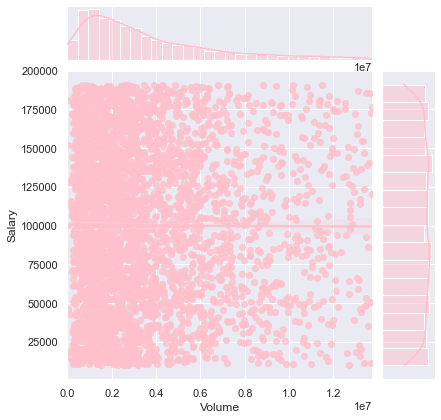

In [64]:
sns.jointplot(y='Salary',x = 'Volume', kind = "reg", data = df,  ax=axarr[2][1],color="pink")

### Joint Plot Salary & low

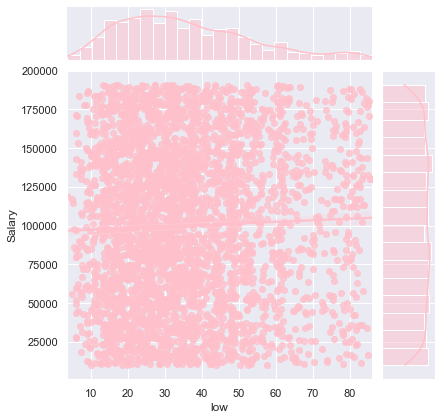

In [65]:
sns.jointplot(y='Salary',x = 'low', kind = "reg", data = df,color="pink")

# Box Plot

<AxesSubplot:xlabel='Gender', ylabel='Salary'>

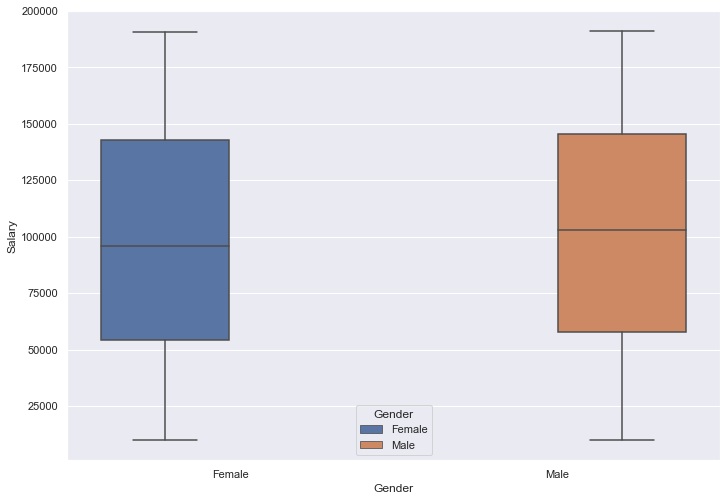

In [69]:
#for better understanding and to check the outliers I used boxplot
sns.boxplot(y='Salary',x = 'Gender', hue = 'Gender',data = df)

<AxesSubplot:xlabel='Rating', ylabel='Salary'>

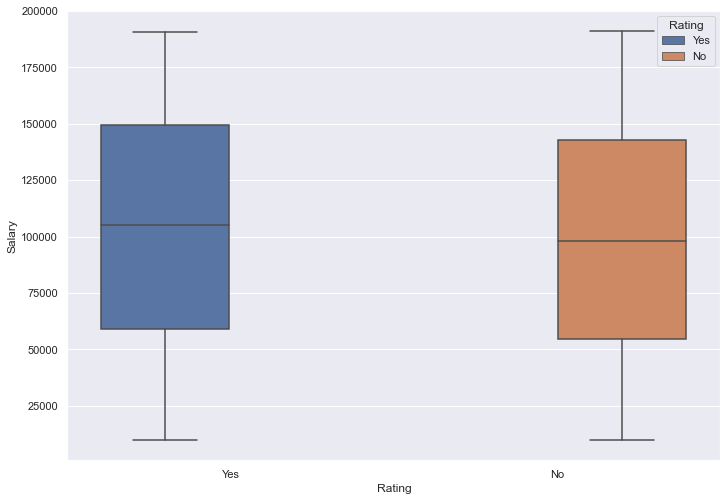

In [70]:
sns.boxplot(y='Salary',x = 'Rating', hue = 'Rating',data = df)

<AxesSubplot:xlabel='Type', ylabel='Salary'>

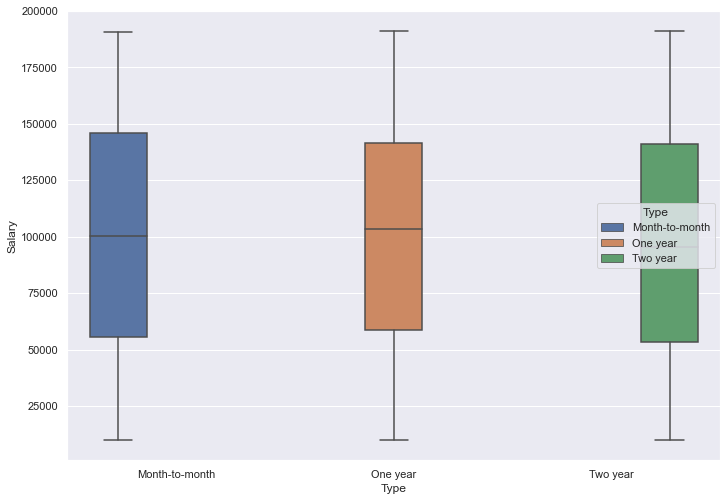

In [71]:
sns.boxplot(y='Salary',x = 'Type', hue = 'Type',data = df)

<AxesSubplot:xlabel='Billing', ylabel='Salary'>

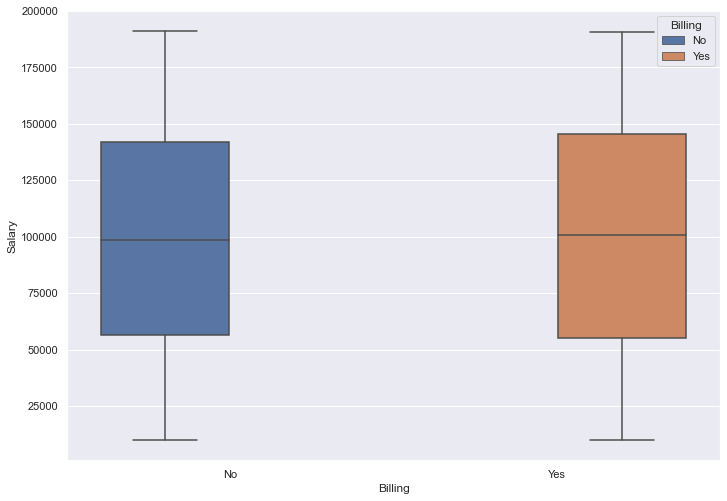

In [72]:
sns.boxplot(y='Salary',x = 'Billing', hue = 'Billing',data = df)

In [ ]:

sns.boxplot(y='Salary',x = 'Calls', hue = 'Calls',data = df)

In [73]:

df = df.drop(["Age", "Months","Unit_Sales","Total_Sales","Unit_Price","Volume","low","Business","Dependancies","Billing"], axis = 1)
df.head()



,Gender,Salary,Calls,Type,Rating
251,Female,97932.68,Yes,Month-to-month,Yes
253,Male,57558.95,Yes,One year,No
255,Female,34283.23,No,Two year,No
257,Male,156917.12,Yes,One year,No
258,Female,50457.20,Yes,Month-to-month,Yes


In [74]:
df = df[['Gender','Calls','Rating', 'Type', 'Salary']]
df.head()

,Gender,Calls,Rating,Type,Salary
251,Female,Yes,Yes,Month-to-month,97932.68
253,Male,Yes,No,One year,57558.95
255,Female,No,No,Two year,34283.23
257,Male,Yes,No,One year,156917.12
258,Female,Yes,Yes,Month-to-month,50457.20


# Label Encoding on Categorical Values
Converting the Probable Categorical value into binary form 

# Gender

In [75]:
#converting the probable categorical value into binary form for ease of operation
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder() 
df['Gender'] = lb.fit_transform(df['Gender'])
print(df['Gender'])

251     0
253     1
255     0
257     1
258     0
       ..
5043    1
5044    1
5046    0
5047    1
5048    0
Name: Gender, Length: 3513, dtype: int32


# Calls

In [76]:
#converting the probable categorical value into binary form for ease of operation
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder() 
df['Calls'] = lb.fit_transform(df['Calls'])
print(df['Calls'])

251     1
253     1
255     0
257     1
258     1
       ..
5043    1
5044    1
5046    1
5047    1
5048    1
Name: Calls, Length: 3513, dtype: int32


# Rating

In [77]:
#converting the probable categorical value into binary form for ease of operation
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder() 
df['Rating'] = lb.fit_transform(df['Rating'])
print(df['Rating'])

251     1
253     0
255     0
257     0
258     1
       ..
5043    1
5044    0
5046    0
5047    0
5048    0
Name: Rating, Length: 3513, dtype: int32


# Type

In [78]:
#converting the probable categorical value into binary form for ease of operation
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder() 
df['Type'] = lb.fit_transform(df['Type'])
print(df['Type'])

251     0
253     1
255     2
257     1
258     0
       ..
5043    0
5044    0
5046    0
5047    0
5048    1
Name: Type, Length: 3513, dtype: int32


# Standard Scaling

In [79]:
#Here, I used StandardScaler to remove the mean and scales each feature to unit variance.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_df = pd.DataFrame(StandardScaler().fit_transform(df),columns = df.columns)
scaled_df.head()



,Gender,Calls,Rating,Type,Salary
0,-1.011740,0.315485,1.682549,-0.811386,-0.040686
1,0.988396,0.315485,-0.594336,0.395899,-0.818796
2,-1.011740,-3.169727,-0.594336,1.603184,-1.267382
3,0.988396,0.315485,-0.594336,0.395899,1.096102
4,-1.011740,0.315485,1.682549,-0.811386,-0.955666


In [80]:
#Choossing the independent variable X and the dependent variable Y
X = scaled_df.iloc[:, 0:-1] 
y = scaled_df.iloc[:, -1] 

df.head(5)

,Gender,Calls,Rating,Type,Salary
251,0,1,1,0,97932.68
253,1,1,0,1,57558.95
255,0,0,0,2,34283.23
257,1,1,0,1,156917.12
258,0,1,1,0,50457.20


In [81]:
X[0:5]

,Gender,Calls,Rating,Type
0,-1.011740,0.315485,1.682549,-0.811386
1,0.988396,0.315485,-0.594336,0.395899
2,-1.011740,-3.169727,-0.594336,1.603184
3,0.988396,0.315485,-0.594336,0.395899
4,-1.011740,0.315485,1.682549,-0.811386


In [82]:
y[0:5]

0   -0.040686
1   -0.818796
2   -1.267382
3    1.096102
4   -0.955666
Name: Salary, dtype: float64

# Machine Learning

In [83]:
#Importing the requres ML Librarires
from sklearn.model_selection import train_test_split
#train_test_split function used to split datas into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

# Applying Regression Modelling

In [84]:
#Appling linear Regression model on the training set

from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

#Appling KNeighbors Regressor model on the training set

from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

#Appling Decision Tree Regressor model on the training set

from sklearn.tree import DecisionTreeRegressor 
dec_tree_reg=DecisionTreeRegressor(random_state = 0) 
dec_tree_reg.fit(X_train,y_train)

#Appling Random Forest Regressor model on the training set

from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train, y_train)

#Appling Support vectorRegressor model on the training set

from sklearn.svm import SVR
support_vector_reg = SVR()
support_vector_reg.fit(X_train, y_train)

SVR()

# Evaluating the model

In [85]:
from sklearn.metrics import mean_squared_error, f1_score
def rmse_score(model, X_train, X_test, y_train, y_test):
    mse_train = mean_squared_error(y_true = y_train,
                                  y_pred = model.predict(X_train))
    mse_test = mean_squared_error(y_true = y_test,
                                  y_pred = model.predict(X_test))
    rmse_train = mse_train ** 0.5
    rmse_test = mse_test ** 0.5
    
    print("The training RMSE for " + str(model) + " is: " + str(rmse_train))
    print("The testing RMSE for " + str(model) + " is: " + str(rmse_test))
    return (rmse_train, rmse_test)

# Linear Regression

In [86]:
x1,y1 = rmse_score(linear_reg, X_train, X_test, y_train, y_test)

The training RMSE for LinearRegression() is: 0.9962779230336416
The testing RMSE for LinearRegression() is: 1.0051312141525894


# KNN Regression

In [87]:
x2,y2= rmse_score(knn_reg, X_train, X_test, y_train, y_test)

The training RMSE for KNeighborsRegressor() is: 1.0383119460964298
The testing RMSE for KNeighborsRegressor() is: 1.0300138926716793


# Decision Tree Regression

In [88]:
x3,y3= rmse_score(dec_tree_reg, X_train, X_test, y_train, y_test)

The training RMSE for DecisionTreeRegressor(random_state=0) is: 0.9928717079793761
The testing RMSE for DecisionTreeRegressor(random_state=0) is: 1.0066372645094346


# Random Forest Regression

In [89]:
x4, y4= rmse_score(random_forest_reg, X_train, X_test, y_train, y_test)



The training RMSE for RandomForestRegressor() is: 0.9929253318250506
The testing RMSE for RandomForestRegressor() is: 1.0065317269901626


# Support Vector Regression

In [90]:
x5, y5 = rmse_score(support_vector_reg, X_train, X_test, y_train, y_test)

The training RMSE for SVR() is: 0.9954618384948543
The testing RMSE for SVR() is: 1.010757259156074


# Plotting the Results

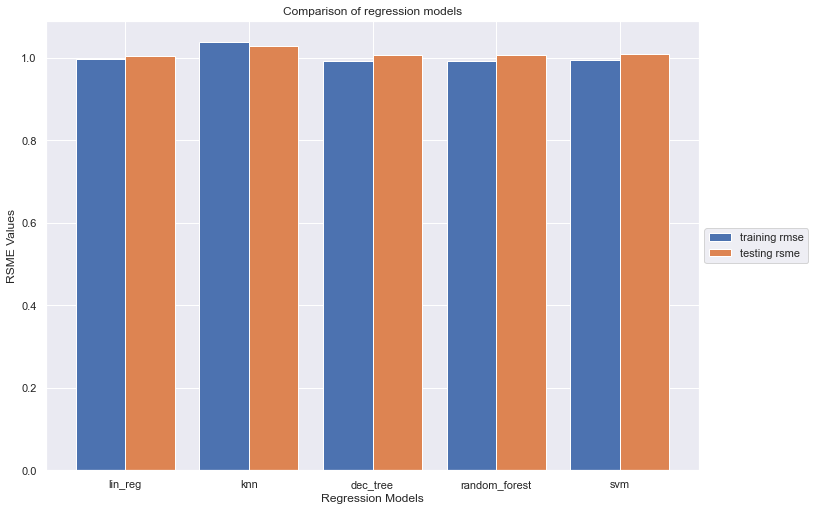

In [91]:
X = ['lin_reg','knn','dec_tree','random_forest' , 'svm']
train = [x1,x2,x3,x4,x5]
test = [y1,y2,y3,y4,y5]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, train, 0.4, label = 'training rmse')
plt.bar(X_axis + 0.2, test, 0.4, label = 'testing rsme')
  
plt.xticks(X_axis, X)
plt.xlabel("Regression Models")
plt.ylabel("RSME Values")
plt.title("Comparison of regression models")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Conclusion: